# MS763: Applied Markov processes | Histograms in Python

Hugo Touchette

Last updated: 13 Nov 2019

Python 3

Reference:
- https://www.datacamp.com/community/tutorials/histograms-matplotlib
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = np.array([np.random.randn() for i in range(10**4)])

## Simple way: hist function

The function hist is part of the Matplotlib library. By default, hist gives the histogram values in addition to the plot.

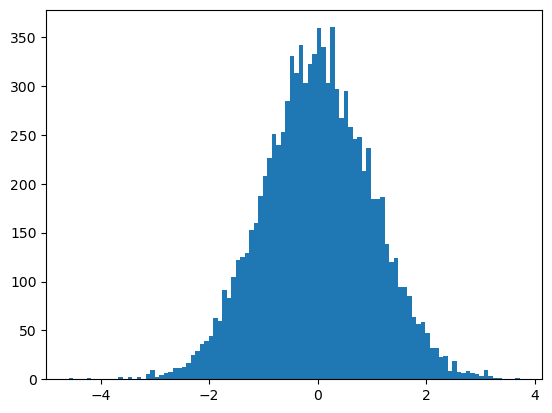

In [ ]:
plt.hist(data,100);

To only get the plot, use the show command. Also use the 'density' option to make sure the histogram is normalised as a probability density.

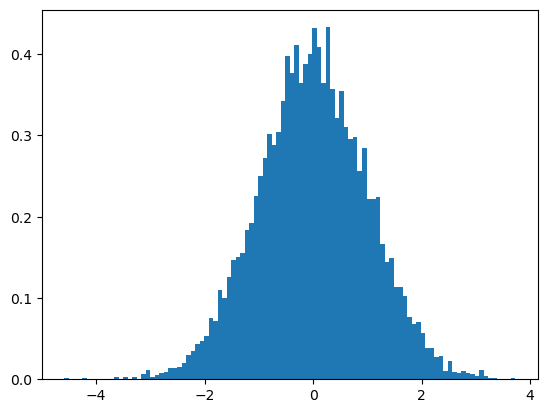

In [ ]:
plt.hist(data, 100, density=True)
plt.show()

## Better way: histogram function

Numpy has a histogram command which is quite comprehensive:

In [ ]:
np.histogram(data, 10)

(array([   2,   22,  161,  861, 2294, 3272, 2318,  882,  165,   23]),
 array([-4.58707379, -3.75572548, -2.92437717, -2.09302886, -1.26168056,
        -0.43033225,  0.40101606,  1.23236437,  2.06371268,  2.89506099,
         3.72640929]))

The first array is the bin counts, not normalised. The second array contains the $n+1$ points that specify the bases of the $n$ bins we want, so that array has one more point than the bin count array. With this in mind, here's how we can plot the result as a bar chart:

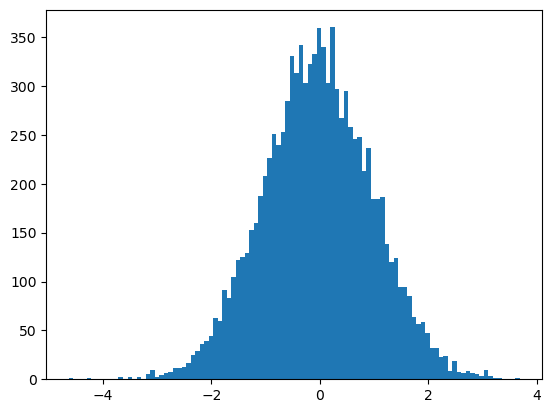

In [ ]:
nbins = 100
hist, bin_spec = np.histogram(data, nbins)
a, b = min(bin_spec), max(bin_spec)
dx = (b-a)/nbins
plt.bar(bin_spec[:-1], hist, width = dx)
plt.show()

The directive bin_spec[:-1] takes all elements except the last, so we are positioning the bins with the left coordinates. To position the bins with center points, push the position by $dx/2$:

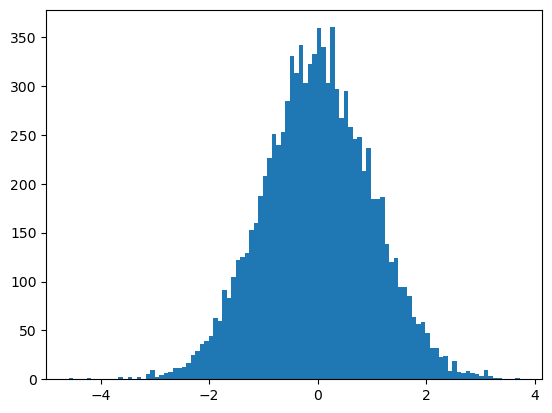

In [ ]:
nbins = 100
hist, bin_spec = np.histogram(data, nbins)
a, b = min(bin_spec), max(bin_spec)
dx = (b-a)/nbins
plt.bar(bin_spec[:-1]+dx/2.0, hist, width = dx)
plt.show()

As it is, the histogram is not normalised as a probability density. To force that normalisation, use again the 'density' option:

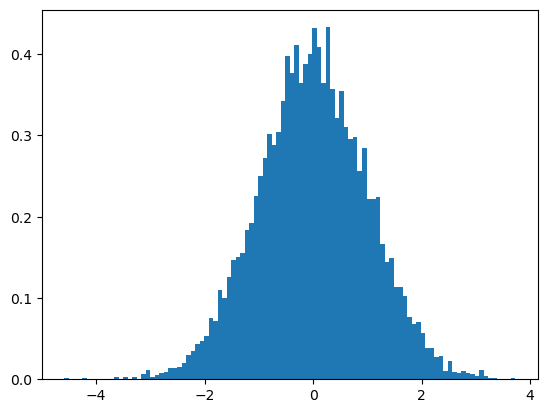

In [ ]:
nbins = 100
hist, bin_spec = np.histogram(data, nbins, density=True)
a, b = min(bin_spec), max(bin_spec)
dx = (b-a)/nbins
plt.bar(bin_spec[:-1]+dx/2.0, hist, width = dx)
plt.show()